# <center> Project 2: Performance of Ridge Regularized Logistic Regression

#### <center> PHAM Manh-Dan, RAUDE Charles, SADE Adrien

Importing some packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model

from google.colab import files

### <center> Question 1

In [ ]:
def rho(t):
    return np.log(1 + np.exp(t))

def rho_prime(t):
    return np.exp(t)/(1 + np.exp(t))

def rho_second(t):
    return np.exp(t)/(1 + np.exp(t))**2

In [ ]:
n = 1000
x_min = -2
x_max = 2
u = np.linspace(x_min, x_max, n)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

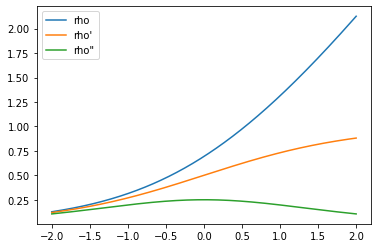

In [ ]:
y = rho(u)
y_prime = rho_prime(u)
y_sec  = rho_second(u)

plt.plot(u, y, label = "rho")
plt.plot(u, y_prime, label = "rho'")
plt.plot(u, y_sec, label = 'rho"')
plt.legend()
plt.savefig("question1.png")
files.download("question1.png")

### <center> Question 2


We are looking to solve the following equation:
$ z + t\rho'(z) = u $. 

We introduce the following notation:
$ f(z) = z + t \rho'(z) - u $. 

We are looking for a 0 of f using Newton's method. 

Taking the derivative of f:
$ f'(z) = 1 + t\rho"(z) $ 

In [ ]:
N_iter = 100
eps = 1e-3


def f(z, t, u):
    return z + t*rho_prime(z) - u

def f_prime(z, t):
    return 1 + t*rho_second(z)

def Newton(z_0, t, u):
    n_iter = 1
    z_1 = z_0 - f(z_0, t, u)/f_prime(z_0, t)
    err = f(z_1, t, u)
    
    while n_iter <= N_iter and np.max(np.abs(err)) > eps:    
        n_iter += 1
        z_0 = z_1
        z_1 = z_0 - f(z_0, t, u)/f_prime(z_0, t)
        err = f(z_1, t, u)
    
    return z_1

### <center> Question 3
    
Plotting in the same graph for $t = 5.0$ the three functions $f_1: u \mapsto prox[t\rho](u)$, $f_2: u \mapsto u$ and $f_3: u \mapsto u - t$ in the range $[-10, 10]$.

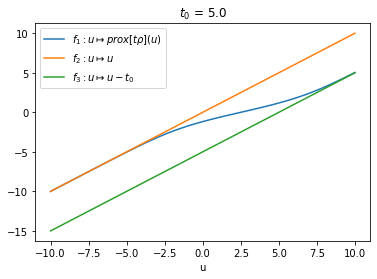

In [ ]:
t_0 = 5.0
z_0 = 0
N_points = 1000

u = np.linspace(-10, 10, 100)
f_2 = u
f_1 = Newton(z_0, t_0, u)

f_3 = u - t_0

plt.title(f"$t_0$ = {t_0}")
plt.plot(u, f_1, label=r"$f_1: u \mapsto prox[t ρ](u)$")
plt.plot(u, f_2, label="$f_2: u \mapsto u $")
plt.plot(u, f_3, label="$f_3: u \mapsto u - t_0$")
plt.xlabel("u")
plt.legend()
plt.savefig("question2.png")

### <center> Question 4
    
We have the following system:
$$
\begin{aligned}
\left\{
\begin{array}{lll}
\sigma^2 &= 2 \delta \mathbb{E}\left[\rho'(-\kappa Z_1) \left(\kappa \alpha Z_1 + \sigma Z_2 - prox[\gamma \rho](\kappa \alpha Z_1 + \sigma Z_2)\right)^2 \right] \\
\alpha &= - 2 \delta \mathbb{E}\left[\rho"(-\kappa Z_1)prox[\gamma \rho](\kappa \alpha Z_1 + \sigma Z_2) \right] \\
\lambda \gamma + 1 - \delta ^{-1} &= \mathbb{E} \left[\dfrac{2 \rho'(-\kappa Z_1)}{1+\gamma \rho" \left(prox[\gamma\rho](\kappa \alpha Z_1 + \sigma Z_2)\right)} \right]
\end{array}
\right.
\end{aligned}
$$

Let us define $F$:
$$
F(\sigma, \alpha, \gamma) = 
\left\{
\begin{array}{lll}
\sqrt{ 2 \delta \mathbb{E}\left[\rho'(-\kappa Z_1) \left(\kappa \alpha Z_1 + \sigma Z_2 - prox[\gamma \rho](\kappa \alpha Z_1 + \sigma Z_2)\right)^2 \right]} \\
- 2 \delta \mathbb{E}\left[\rho"(-\kappa Z_1)prox[\gamma \rho](\kappa \alpha Z_1 + \sigma Z_2) \right] \\
\dfrac{1}{\lambda} \left(\delta^{-1} - 1 +  \mathbb{E} \left[\dfrac{2 \rho'(-\kappa Z_1)}{1+\gamma \rho" \left(prox[\gamma\rho](\kappa \alpha Z_1 + \sigma Z_2)\right)} \right] \right)
\end{array}
\right.
$$
    
We thus get by an easy calculation that $(\bar{\alpha}, \bar{\sigma}, \bar{\gamma})$ is solution to the first system if and only it is a fixed point of F (ie. $F(\bar{\alpha}, \bar{\sigma}, \bar{\gamma}) = (\bar{\alpha}, \bar{\sigma}, \bar{\gamma})$).

### <center> Question 5 (Implementation of the iterative scheme)

In [ ]:
draw_nb = 10000
iter_nb = 100

kappa = 1
delta = 1
lda = 1

def iterative_scheme(lda, delta, kappa=1):
    alpha, sigma, gamma = [0, 0, 0]   # starting from (0, 0, 0)
    for t in range(iter_nb):
        # Drawing 2 independent draws
        Z1_samples = np.random.normal(0, 1, draw_nb)
        Z2_samples = np.random.normal(0, 1, draw_nb)
        u = kappa*alpha*Z1_samples + sigma*Z2_samples
        prox_gamma_rho = Newton(0, gamma, u)
        sigma = np.sqrt(2*delta*np.mean(rho_prime(-kappa*Z1_samples) * (u - prox_gamma_rho)**2))
        alpha = -2*delta*np.mean(rho_second(-kappa*Z1_samples) * prox_gamma_rho)
        gamma = 1/lda * (delta**-1 - 1 + np.mean(2*rho_prime(-kappa*Z1_samples) *  (1 + gamma*rho_second(prox_gamma_rho))**-1)) 
    return sigma, alpha, gamma

### <center> Question 6

#### First method using  $\lambda$

In [ ]:
delta = [0.5, 1, 2, 4]
lda_number = 20 
lda = np.linspace(0.19, 1.5, lda_number)

Sigma = []
Alpha = []
Gamma = []


for d in delta:
    for l in lda:
        sigma, alpha, gamma = iterative_scheme(l, d)
        Sigma.append(sigma)
        Alpha.append(alpha)
        Gamma.append(gamma)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

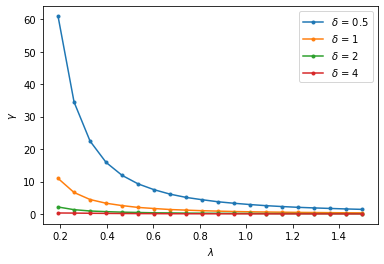

In [ ]:
for index, elt in enumerate(delta):
    gamma_sq = np.array(Gamma[index*lda_number:(index+1)*lda_number])**2
    plt.plot(lda, gamma_sq, '.-', label=f"$\delta$ = {elt}")
plt.xlabel("$\lambda$")
plt.ylabel("$\gamma$")
plt.legend()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

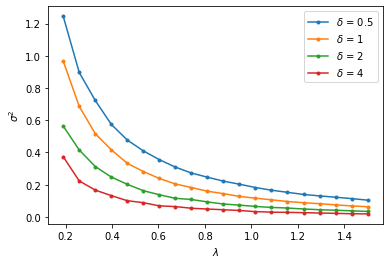

In [ ]:
for index, elt in enumerate(delta):
    sigma_sq = np.array(Sigma[index*lda_number:(index+1)*lda_number])**2
    plt.plot(lda, sigma_sq, '.-', label=f"$\delta$ = {elt}")
plt.xlabel("$\lambda$")
plt.ylabel("$\sigma^2$")
plt.legend()

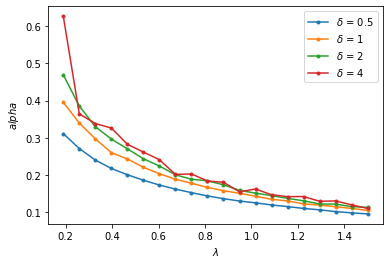

In [ ]:
for index, elt in enumerate(delta):
    alpha = Alpha[index*lda_number:(index+1)*lda_number]
    plt.plot(lda, alpha, '.-', label=f"$\delta$ = {elt}")
plt.xlabel("$\lambda$")
plt.ylabel("$alpha$")
plt.legend()

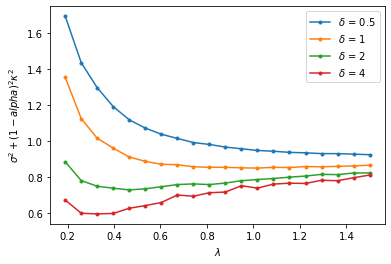

In [ ]:
for index, elt in enumerate(delta):
    alpha = Alpha[index*lda_number:(index+1)*lda_number]
    sigma_sq = np.array(Sigma[index*lda_number:(index+1)*lda_number])**2
    plt.plot(lda, sigma_sq + (np.ones(len(alpha)) - alpha)**2 * (kappa**2), '.-', label=f"$\delta$ = {elt}")
plt.xlabel("$\lambda$")
plt.ylabel("$\sigma^2 + (1-alpha)^2 \kappa^2$")
plt.legend()

#### Second method using $\gamma$ which is more stable

In [ ]:
draw_nb = 10000
iter_nb = 100

kappa = 1
delta = 1
gamma = 1

def iterative_scheme2(gamma, delta, kappa=1):
    alpha, sigma, lda = [0, 0, 0]   # starting from (0, 0, 0)
    for t in range(iter_nb):
        # Drawing 2 independent draws
        Z1_samples = np.random.normal(0, 1, draw_nb)
        Z2_samples = np.random.normal(0, 1, draw_nb)
        u = kappa*alpha*Z1_samples + sigma*Z2_samples
        prox_gamma_rho = Newton(0, gamma, u)
        sigma = np.sqrt(2*delta*np.average(rho_prime(-kappa*Z1_samples) * (u - prox_gamma_rho)**2))
        alpha = -2*delta*np.average(rho_second(-kappa*Z1_samples) * prox_gamma_rho)
        lda = 1/gamma * (1/delta - 1 + np.average(2*rho_prime(-kappa*Z1_samples) *  1/(1 + gamma*rho_second(prox_gamma_rho)))) 
    return sigma, alpha, lda

In [ ]:
delta = [0.5, 1, 2, 4]
gamma_number = 26 
gamma = np.array([0.1*1.2**k for k in range(gamma_number)])
Sigma = []
Alpha = []
Lda = []


for d in delta:
    for g in gamma:
        sigma, alpha, lda = iterative_scheme2(g, d)
        Sigma.append(sigma)
        Alpha.append(alpha)
        Lda.append(lda)

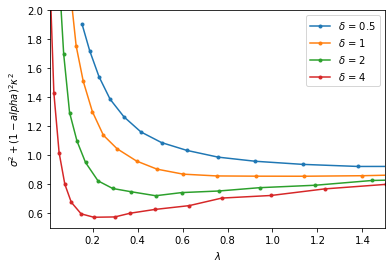

In [ ]:
for index, elt in enumerate(delta):
    alpha = Alpha[index*gamma_number:(index+1)*gamma_number]
    sigma_sq = np.array(Sigma[index*gamma_number:(index+1)*gamma_number])**2
    lda = Lda[index*gamma_number:(index+1)*gamma_number]
    plt.plot(lda, sigma_sq + (np.ones(len(alpha)) - alpha)**2 * (kappa**2) , '.-', label=f"$\delta$ = {elt}")
plt.xlabel("$\lambda$")
plt.ylabel("$\sigma^2 + (1-alpha)^2 \kappa^2$")
plt.ylim(0.5,2)
plt.xlim(0.01,1.5)
plt.legend()

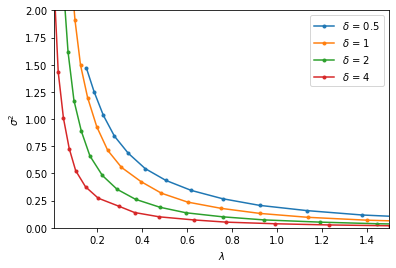

In [ ]:
for index, elt in enumerate(delta):
    sigma_sq = np.array(Sigma[index*gamma_number:(index+1)*gamma_number])**2
    lda = Lda[index*gamma_number:(index+1)*gamma_number]
    plt.plot(lda, sigma_sq, '.-', label=f"$\delta$ = {elt}")
plt.xlabel("$\lambda$")
plt.ylabel("$\sigma^2$")
plt.ylim(0,2)
plt.xlim(0.01,1.5)
plt.legend()

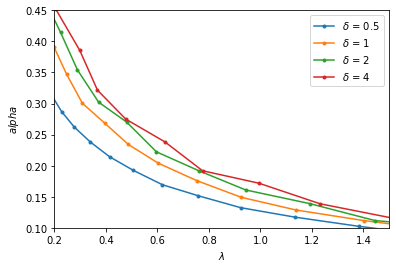

In [ ]:
for index, elt in enumerate(delta):
    alpha = Alpha[index*gamma_number:(index+1)*gamma_number]
    lda = Lda[index*gamma_number:(index+1)*gamma_number]
    plt.plot(lda, alpha, '.-', label=f"$\delta$ = {elt}")
    
plt.xlabel("$\lambda$")
plt.ylabel("$alpha$")
plt.ylim(0.1,0.45)
plt.xlim(0.2,1.5)
plt.legend()

The curve 1.(c) corresponds to $\sigma^2 + (1-\alpha)^2 \kappa^2$


Link to the article in question : https://arxiv.org/pdf/1906.03761.pdf

### <center> Question 7

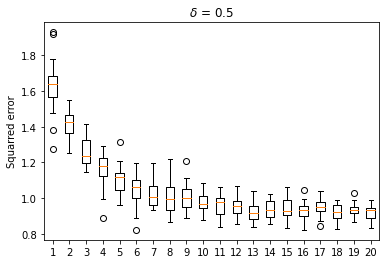

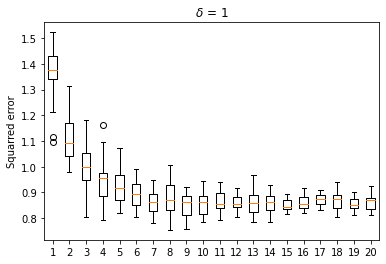

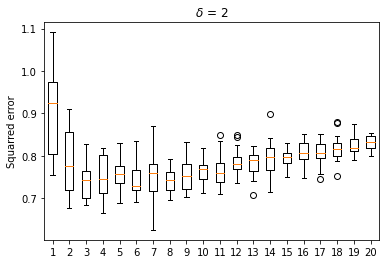

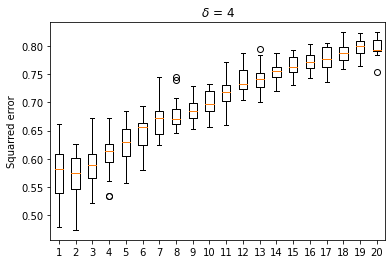

In [ ]:
delta = [0.5, 1, 2, 4]
lda_number = 20 
lda = np.linspace(0.19, 1.5, lda_number)

nb_repet = 20
p = 200
beta_star = np.random.rand(p)
beta_star = (beta_star / np.linalg.norm(beta_star)) * np.sqrt(p*kappa)  # We create a vector beta_star with norm sqrt(p*kappa)


def beta_hat(n, p, l, beta_star):
  X = np.random.multivariate_normal(np.zeros(p), np.identity(p)/p, n)
  Y = np.empty(n)
  for i in range(n):
    Y[i] = np.random.binomial(1, 1/(1+np.exp(-X[i].T @ beta_star)))   
  model = sklearn.linear_model.LogisticRegression(C=p/(l*n))
  model.fit(X, Y)
  return model.coef_[0]


list_se = []
for d in delta:
  dict_d_se = dict([])  # Dictionnary: {'delta': list of squared errors for different lambdas}
  n = int(p*d)
  fig, ax = plt.subplots()

  for index, l in enumerate(lda):
    se = []
    for i in range(nb_repet):
      se.append((np.linalg.norm(beta_star - beta_hat(n, p, l, beta_star))**2)/p)
    dict_d_se[l] = se
    list_se.append(np.mean(se))

  ax.boxplot(dict_d_se.values())
  plt.title(f'$\delta$ = {d}')
  plt.ylabel('Squarred error')
  plt.show()

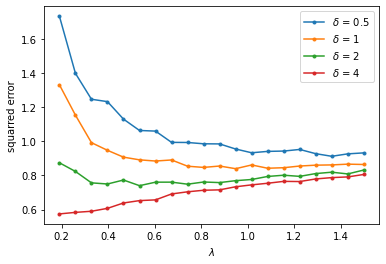

In [ ]:
for index, elt in enumerate(delta):
  se = list_se[index*lda_number:(index+1)*lda_number]
  plt.plot(lda, se, '.-', label=f"$\delta$ = {elt}")
plt.xlabel("$\lambda$")
plt.ylabel("squarred error")
plt.legend()